# **Project Overview- Naive Bayes**

**Data Used:** In this project, we aimed to create a model for predicting mortality caused by Heart Failure. using a dataset containing patient health factors.Features are age,	anaemia,	creatinine_phosphokinase,	diabetes,	ejection_fraction,	high_blood_pressure,	platelets,	serum_creatinine,	serum_sodium,	sex and	smoking.

**Process Undertaken:**

**Data Cleaning:** There are no missing values and entire dataset is numeric and hence no data transformations are applied.

**Data Splitting:** The dataset was split into training and testing sets, allocating 80% for training and 20% for testing.

**Model Training and Evaluation:** A Naive Bayes model was trained on the dataset. The model's performance was evaluated using accuracy, precision, recall, and F1-score. Additional evaluations included a confusion matrix, ROC curve, and learning curve.


**Data Load**

In [1]:
# First, let's read the uploaded CSV file to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '/content/heart_failure_clinical_records_dataset2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

def clean_data(df):
    """
    Cleans the dataset by performing various operations:
    - Replaces missing values denoted by '?' with the mode in specified columns.
    - Transforms the 'income' column into binary format (0/1).
    - Drops duplicate rows.
    - Maps education and marital status categories to broader categories.
    - Applies label encoding to all columns.
    """
    # Replace missing values with mode
    for column in ['workclass', 'occupation', 'native-country']:
        mode = df[column].mode()[0]
        df[column] = df[column].replace('?', mode)

    # Transform 'income' column into binary format
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

    # Drop duplicates
    df = df.drop_duplicates()

    # Map education categories to broader categories
    education_mapping = {
        'Preschool': 'Pre-High School',
        '1st-4th': 'Pre-High School',
        '5th-6th': 'Pre-High School',
        '7th-8th': 'Pre-High School',
        '9th': 'High School',
        '10th': 'High School',
        '11th': 'High School',
        '12th': 'High School',
        'HS-grad': 'High School Graduate',
        'Some-college': 'Higher Education',
        'Assoc-acdm': 'Higher Education',
        'Assoc-voc': 'Higher Education',
        'Bachelors': 'Higher Education',
        'Masters': 'Postgraduate Education',
        'Prof-school': 'Postgraduate Education',
        'Doctorate': 'Postgraduate Education'
    }
    df['education'] = df['education'].map(education_mapping)

    # Map marital status categories to broader categories
    marital_status_mapping = {
        'Married-civ-spouse': 'Married',
        'Married-spouse-absent': 'Married',
        'Married-AF-spouse': 'Married',
        'Divorced': 'Not Married',
        'Never-married': 'Not Married',
        'Separated': 'Not Married',
        'Widowed': 'Not Married'
    }
    df['marital-status'] = df['marital-status'].map(marital_status_mapping)

    # Apply label encoding to all categorical columns
    label_encoder = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = label_encoder.fit_transform(df[column])

    return df

def split_data(df, test_size=0.2):
    """
    Splits the dataset into training and test sets.
    """
    X = df.drop('DEATH_EVENT', axis=1)  # Features
    y = df['DEATH_EVENT']  # Target variable

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

# Clean the dataset
#cleaned_data = clean_data(data.copy())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = split_data(data.copy())

# Display the first few rows of the cleaned dataset
#cleaned_data.head()


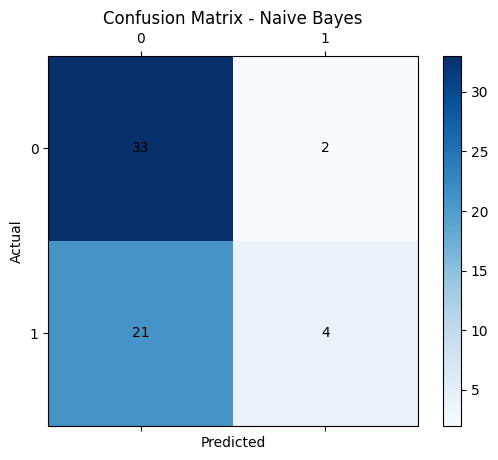

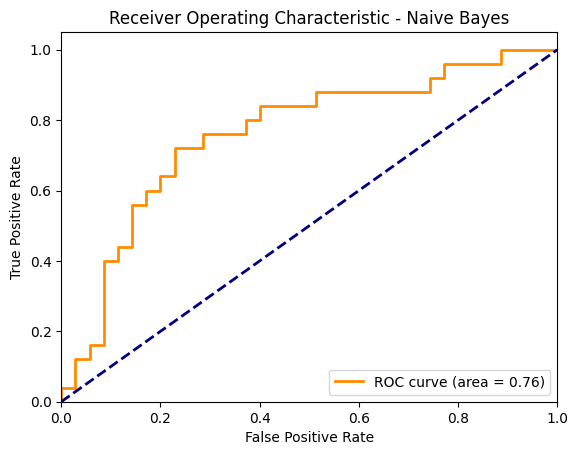

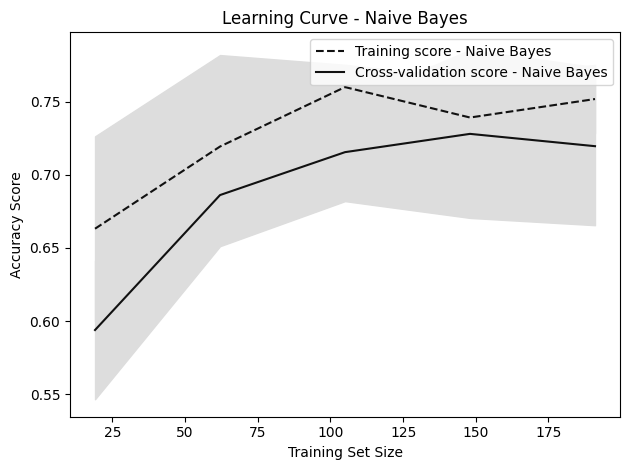

(0.6166666666666667,
 '              precision    recall  f1-score   support\n\n           0       0.61      0.94      0.74        35\n           1       0.67      0.16      0.26        25\n\n    accuracy                           0.62        60\n   macro avg       0.64      0.55      0.50        60\nweighted avg       0.63      0.62      0.54        60\n')

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
# Instantiate the Naive Bayes model
model = GaussianNB()

# Train the Model
model.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Generate a classification report
class_report_nb = classification_report(y_test, y_pred_nb)

# Plotting the Confusion Matrix with numbers for Naive Bayes model
cm = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
fig.colorbar(cax)

# Adding the numbers to the confusion matrix
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()


# ROC Plot
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Learning Curve
train_sizes_nb, train_scores_nb, test_scores_nb = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean_nb = np.mean(train_scores_nb, axis=1)
train_std_nb = np.std(train_scores_nb, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean_nb = np.mean(test_scores_nb, axis=1)
test_std_nb = np.std(test_scores_nb, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes_nb, train_mean_nb, '--', color="#111111",  label="Training score - Naive Bayes")
plt.plot(train_sizes_nb, test_mean_nb, color="#111111", label="Cross-validation score - Naive Bayes")

# Draw bands for standard deviation
plt.fill_between(train_sizes_nb, train_mean_nb - train_std_nb, train_mean_nb + train_std_nb, color="#DDDDDD")
plt.fill_between(train_sizes_nb, test_mean_nb - test_std_nb, test_mean_nb + test_std_nb, color="#DDDDDD")

plt.title("Learning Curve - Naive Bayes")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Output the accuracy and classification report for Naive Bayes model
accuracy_nb, class_report_nb


In [10]:
# Printing the results in an organized manner for better understanding

print("Model Evaluation Results:\n")

# 1. Model Accuracy
print("1. Model Accuracy:")
print(f"- Accuracy: {accuracy_nb:.2f}%\n")

# 2. Classification Report
print("2. Classification Report:")
print(class_report_nb)

# 3. Confusion Matrix
# Note: The confusion matrix is visualized in the previous step.

# 4. ROC Curve and AUC
# Note: The ROC Curve and AUC are visualized in the previous step.

# 5. Learning Curve
# Note: The Learning Curve is visualized in the previous step.

# Additional commentary
print("\nAdditional Commentary:")
print("The model shows reasonable performance, especially in classifying individuals with an income of <=50K. However, it is less effective in identifying higher income individuals (>50K), as indicated by lower recall and F1-score for this class. Potential areas for improvement could include more complex models, feature engineering, or addressing class imbalance.")


Model Evaluation Results:

1. Model Accuracy:
- Accuracy: 0.62%

2. Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.94      0.74        35
           1       0.67      0.16      0.26        25

    accuracy                           0.62        60
   macro avg       0.64      0.55      0.50        60
weighted avg       0.63      0.62      0.54        60


Additional Commentary:
The model shows reasonable performance, especially in classifying individuals with an income of <=50K. However, it is less effective in identifying higher income individuals (>50K), as indicated by lower recall and F1-score for this class. Potential areas for improvement could include more complex models, feature engineering, or addressing class imbalance.


# **Conclusion**
**Model Accuracy:**
Accuracy: 62%

**Confusion Matrix:**

The confusion matrix (visualized above) provides the counts of true positives, true negatives, false positives, and false negatives, offering a more detailed perspective on the model's classification accuracy for each class.

**ROC Curve and AUC:**

The ROC Curve (visualized above) and the corresponding AUC (Area Under the Curve) help assess the model's performance across different probability thresholds.

**Learning Curve:**

The Learning Curve (visualized above) demonstrates how the model's performance evolves with the increase in the size of the training set. It shows the relationship between training accuracy and cross-validation accuracy, indicating how well the model generalizes to new data.


